In [8]:
import pandas as pd

csv_file_path = "housing.csv"

df = pd.read_csv(csv_file_path)
print(df.head()) 
    
columns_to_convert = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for column in columns_to_convert:
    df[column] = df[column].replace({'yes': 1, 'no': 0})

df['furnishingstatus'] = df['furnishingstatus'].replace({'furnished': 1, 'semi-furnished': 2, 'unfurnished': 3})

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [9]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,3
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,2
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,3
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1


Epoch 1/300
14/14 [==============================] - 0s 7ms/step - loss: 25234786746368.0000 - val_loss: 30129988304896.0000
Epoch 2/300
14/14 [==============================] - 0s 3ms/step - loss: 25234782552064.0000 - val_loss: 30129984110592.0000
Epoch 3/300
14/14 [==============================] - 0s 3ms/step - loss: 25234782552064.0000 - val_loss: 30129977819136.0000
Epoch 4/300
14/14 [==============================] - 0s 3ms/step - loss: 25234780454912.0000 - val_loss: 30129977819136.0000
Epoch 5/300
14/14 [==============================] - 0s 3ms/step - loss: 25234774163456.0000 - val_loss: 30129973624832.0000
Epoch 6/300
14/14 [==============================] - 0s 3ms/step - loss: 25234769969152.0000 - val_loss: 30129971527680.0000
Epoch 7/300
14/14 [==============================] - 0s 3ms/step - loss: 25234765774848.0000 - val_loss: 30129963139072.0000
Epoch 8/300
14/14 [==============================] - 0s 3ms/step - loss: 25234763677696.0000 - val_loss: 30129958944768.0000


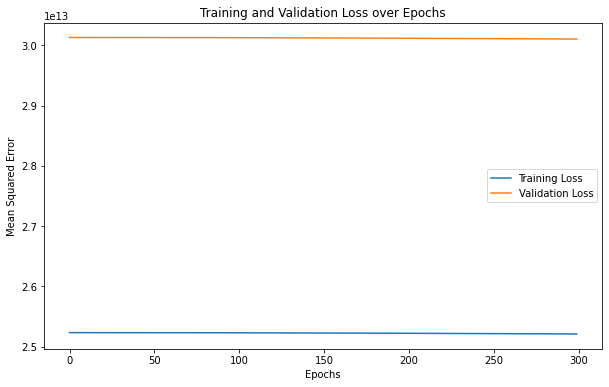

In [13]:
#PROBLEM 1(A)
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the data
data = df

# Select features and target
features = data.drop('price', axis=1).values
target = data['price'].values

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with 1 neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=300, batch_size=32)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()


Epoch 1/500
14/14 [==============================] - 0s 7ms/step - loss: 25234793037824.0000 - val_loss: 30129988304896.0000
Epoch 2/500
14/14 [==============================] - 0s 3ms/step - loss: 25234780454912.0000 - val_loss: 30129971527680.0000
Epoch 3/500
14/14 [==============================] - 0s 4ms/step - loss: 25234765774848.0000 - val_loss: 30129952653312.0000
Epoch 4/500
14/14 [==============================] - 0s 3ms/step - loss: 25234740609024.0000 - val_loss: 30129912807424.0000
Epoch 5/500
14/14 [==============================] - 0s 3ms/step - loss: 25234690277376.0000 - val_loss: 30129845698560.0000
Epoch 6/500
14/14 [==============================] - 0s 3ms/step - loss: 25234612682752.0000 - val_loss: 30129730355200.0000
Epoch 7/500
14/14 [==============================] - 0s 3ms/step - loss: 25234476367872.0000 - val_loss: 30129543708672.0000
Epoch 8/500
14/14 [==============================] - 0s 3ms/step - loss: 25234270846976.0000 - val_loss: 30129233330176.0000


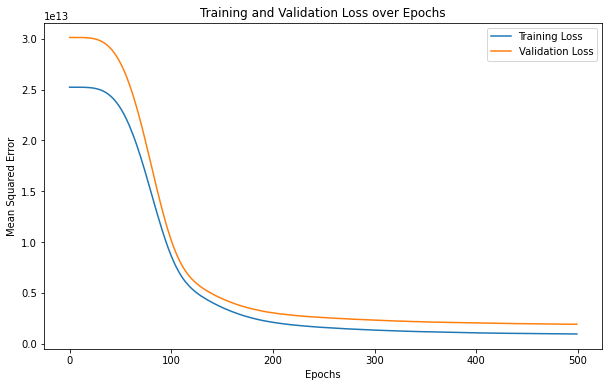

In [14]:
#PROBLEM 1(B)

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the data
data = df

# Select features and target
features = data.drop('price', axis=1).values
target = data['price'].values

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Build the neural network model with three hidden layers
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with 1 neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, batch_size=32)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()


In [16]:
#PROBELM 2(A)
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import time

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the neural network model
model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Record start time for training time calculation
start_time = time.time()

# Train the model
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

# Calculate training time
training_time = time.time() - start_time

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print results
print(f"Training Time: {training_time} seconds")
print(f"Training Loss: {history.history['loss'][-1]}")
print(f"Evaluation Accuracy: {test_accuracy}")

Epoch 1/50
1563/1563 [==============================] - 19s 11ms/step - loss: 1.8955 - accuracy: 0.3266 - val_loss: 1.7807 - val_accuracy: 0.3550
Epoch 2/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.7062 - accuracy: 0.3886 - val_loss: 1.6340 - val_accuracy: 0.4129
Epoch 3/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.6377 - accuracy: 0.4164 - val_loss: 1.6115 - val_accuracy: 0.4259
Epoch 4/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5953 - accuracy: 0.4301 - val_loss: 1.5680 - val_accuracy: 0.4381
Epoch 5/50
1563/1563 [==============================] - 18s 11ms/step - loss: 1.5689 - accuracy: 0.4398 - val_loss: 1.5738 - val_accuracy: 0.4328
Epoch 6/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5482 - accuracy: 0.4501 - val_loss: 1.5821 - val_accuracy: 0.4346
Epoch 7/50
1563/1563 [==============================] - 18s 11ms/step - loss: 1.5270 - accuracy: 0.4558 - val_loss: 1.5318 -

In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import time

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the neural network model with two additional hidden layers
model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Record start time for training time calculation
start_time = time.time()

# Train the model for 300 epochs
history = model.fit(x_train, y_train, epochs=300, validation_data=(x_test, y_test))

# Calculate training time
training_time = time.time() - start_time

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print results
print(f"Training Time: {training_time} seconds")
print(f"Training Loss: {history.history['loss'][-1]}")
print(f"Evaluation Accuracy: {test_accuracy}")

Epoch 1/300
1563/1563 [==============================] - 20s 13ms/step - loss: 1.8667 - accuracy: 0.3207 - val_loss: 1.7308 - val_accuracy: 0.3833
Epoch 2/300
1563/1563 [==============================] - 19s 12ms/step - loss: 1.6849 - accuracy: 0.3947 - val_loss: 1.6409 - val_accuracy: 0.4167
Epoch 3/300
1563/1563 [==============================] - 18s 11ms/step - loss: 1.6006 - accuracy: 0.4237 - val_loss: 1.5901 - val_accuracy: 0.4267
Epoch 4/300
1563/1563 [==============================] - 18s 12ms/step - loss: 1.5473 - accuracy: 0.4450 - val_loss: 1.5487 - val_accuracy: 0.4519
Epoch 5/300
1563/1563 [==============================] - 19s 12ms/step - loss: 1.5048 - accuracy: 0.4610 - val_loss: 1.4974 - val_accuracy: 0.4635
Epoch 6/300
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4772 - accuracy: 0.4721 - val_loss: 1.4936 - val_accuracy: 0.4625
Epoch 7/300
1563/1563 [==============================] - 20s 13ms/step - loss: 1.4441 - accuracy: 0.4821 - val_loss: 1

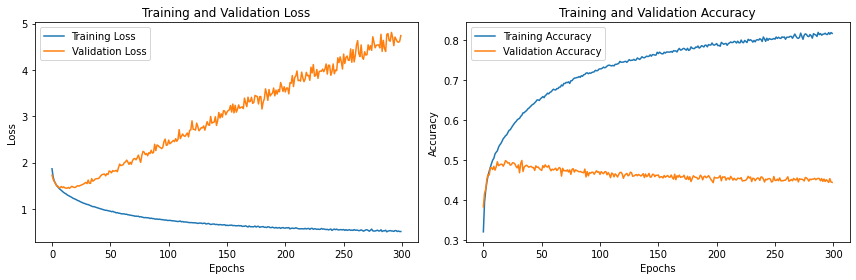

In [18]:
import matplotlib.pyplot as plt

# Plot training loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
